#1. Mount Drive

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
!ls -al '/gdrive/My Drive/Colab Notebooks/자율주행_스터디/Chap3_머신러닝/data'

total 4080
-rw------- 1 root root 4177835 May 20 13:32 data_2020.csv


#2. Korean Character

In [3]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 34 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 2s (5,757 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

In [1]:
import matplotlib.pyplot as plt

In [2]:
plt.rc('font', family='NanumBarunGothic')

#3. Load Data

In [5]:
import pandas as pd

In [6]:
file = '/gdrive/My Drive/Colab Notebooks/자율주행_스터디/Chap3_머신러닝/data/data_2020.csv'
data = pd.read_csv(file)

In [7]:
# distance from Seoul: 0, 20, 77, 135, 185, 240, 215, 339, 407
data["도착영업소코드"]= data["도착영업소코드"].map({105:20, 110:77, 115:135, 120:185, 125:240, 130:215, 135:339, 140:407}) 

In [8]:
data.rename(columns={"도착영업소코드":"거리"}, inplace=True)

In [9]:
data_destination = data[data["거리"]==407]

In [10]:
data_destination

,집계일자,집계시,출발영업소코드,거리,통행시간,요일
303,20200101,6,101,407,15824,2
304,20200101,6,101,407,19623,2
305,20200101,9,101,407,18048,2
306,20200101,17,101,407,17979,2
307,20200101,11,101,407,-1,2
...,...,...,...,...,...,...
157821,20201231,9,101,407,14460,3
157964,20201231,16,101,407,14947,3
157965,20201231,17,101,407,15328,3
157969,20201231,20,101,407,17001,3


In [11]:
data_time = data_destination.groupby(["집계시", "요일", "거리"])["통행시간"].mean()

In [12]:
data_time

집계시  요일  거리 
0    0   407    14383.375000
     1   407    14841.380952
     2   407    14074.116279
     3   407    12802.928571
     4   407    14461.977273
                    ...     
23   2   407    15615.707317
     3   407    14802.428571
     4   407    16707.826923
     5   407    14724.673469
     6   407    14631.891304
Name: 통행시간, Length: 168, dtype: float64

In [13]:
data_distance = data_time.unstack(level=-1)

In [14]:
data_distance

거리               407
집계시 요일              
0   0   14383.375000
    1   14841.380952
    2   14074.116279
    3   12802.928571
    4   14461.977273
...              ...
23  2   15615.707317
    3   14802.428571
    4   16707.826923
    5   14724.673469
    6   14631.891304

[168 rows x 1 columns]

In [15]:
data_distance.dropna()

거리               407
집계시 요일              
0   0   14383.375000
    1   14841.380952
    2   14074.116279
    3   12802.928571
    4   14461.977273
...              ...
23  2   15615.707317
    3   14802.428571
    4   16707.826923
    5   14724.673469
    6   14631.891304

[168 rows x 1 columns]

In [16]:
data_out = data_distance.reset_index()

In [17]:
data_out

거리,집계시,요일,407
0,0,0,14383.375000
1,0,1,14841.380952
2,0,2,14074.116279
3,0,3,12802.928571
4,0,4,14461.977273
...,...,...,...
163,23,2,15615.707317
164,23,3,14802.428571
165,23,4,16707.826923
166,23,5,14724.673469


In [18]:
stat = data_out.describe()

In [19]:
print(stat)

거리            집계시          요일           407
count  168.000000  168.000000    168.000000
mean    11.500000    3.000000  14494.892848
std      6.942881    2.005979   1139.476759
min      0.000000    0.000000  10867.492063
25%      5.750000    1.000000  13769.579167
50%     11.500000    3.000000  14674.567797
75%     17.250000    5.000000  15247.685861
max     23.000000    6.000000  16707.826923


In [20]:
mean_val = stat[407][1]
print(mean_val)

14494.892847614808


In [21]:
data_out['Binary'] = data_out[407] > mean_val

In [22]:
data_out

거리,집계시,요일,407,Binary
0,0,0,14383.375000,False
1,0,1,14841.380952,True
2,0,2,14074.116279,False
3,0,3,12802.928571,False
4,0,4,14461.977273,False
...,...,...,...,...
163,23,2,15615.707317,True
164,23,3,14802.428571,True
165,23,4,16707.826923,True
166,23,5,14724.673469,True


In [23]:
data_out["Binary"] = data_out["Binary"].map({True:1, False:0})

In [24]:
data_out

거리,집계시,요일,407,Binary
0,0,0,14383.375000,0
1,0,1,14841.380952,1
2,0,2,14074.116279,0
3,0,3,12802.928571,0
4,0,4,14461.977273,0
...,...,...,...,...
163,23,2,15615.707317,1
164,23,3,14802.428571,1
165,23,4,16707.826923,1
166,23,5,14724.673469,1


In [25]:
# dataframe to list
data_list = data_out.values.tolist()

In [26]:
data_list[:5]

[[0.0, 0.0, 14383.375, 0.0],
 [0.0, 1.0, 14841.380952380952, 1.0],
 [0.0, 2.0, 14074.116279069767, 0.0],
 [0.0, 3.0, 12802.92857142857, 0.0],
 [0.0, 4.0, 14461.977272727272, 0.0]]

In [27]:
# train dataset
x_train = [r[:2] for r in data_list]
y_train = [r[-1] for r in data_list]

In [28]:
x_train[:5], y_train[:5]

([[0.0, 0.0], [0.0, 1.0], [0.0, 2.0], [0.0, 3.0], [0.0, 4.0]],
 [0.0, 1.0, 0.0, 0.0, 0.0])

#4. Binary Classification Using Tensorflow

In [29]:
import tensorflow as tf
import numpy as np

In [30]:
learning_rate = 1e-4
learning_epochs = 5000

In [31]:
# SGD optimizer
sgd = tf.keras.optimizers.SGD(learning_rate=learning_rate)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(1, input_shape=(2,), activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [33]:
# train the model
history = model.fit(x_train, y_train, epochs=learning_epochs)

Streaming output truncated to the last 5000 lines.
Epoch 2501/5000
6/6 [==============================] - 0s 3ms/step - loss: 0.5051 - accuracy: 0.7440
Epoch 2502/5000
6/6 [==============================] - 0s 3ms/step - loss: 0.5050 - accuracy: 0.7440
Epoch 2503/5000
6/6 [==============================] - 0s 3ms/step - loss: 0.5051 - accuracy: 0.7440
Epoch 2504/5000
6/6 [==============================] - 0s 4ms/step - loss: 0.5051 - accuracy: 0.7440
Epoch 2505/5000
6/6 [==============================] - 0s 3ms/step - loss: 0.5050 - accuracy: 0.7440
Epoch 2506/5000
6/6 [==============================] - 0s 3ms/step - loss: 0.5050 - accuracy: 0.7440
Epoch 2507/5000
6/6 [==============================] - 0s 4ms/step - loss: 0.5050 - accuracy: 0.7440
Epoch 2508/5000
6/6 [==============================] - 0s 3ms/step - loss: 0.5050 - accuracy: 0.7440
Epoch 2509/5000
6/6 [==============================] - 0s 3ms/step - loss: 0.5050 - accuracy: 0.7440
Epoch 2510/5000
6/6 [===================

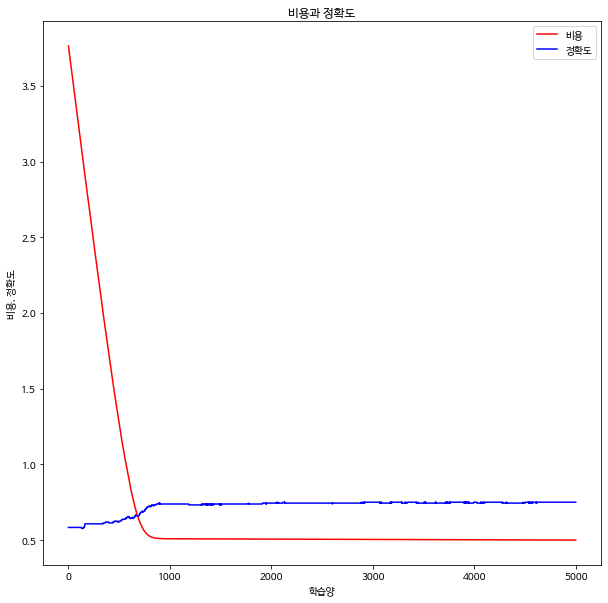

In [34]:
plt.figure(figsize=(10,10))
plt.plot(history.history['loss'], color='r', label="비용")
plt.plot(history.history['accuracy'], color='b', label="정확도")
plt.title("비용과 정확도")
plt.ylabel("비용, 정확도")
plt.xlabel("학습양")
plt.legend()
plt.show()

In [35]:
print("%20s %20s %20s" % ("학습량", "비용", "정확도") + "\n")
for step in range(learning_epochs):
  if step%100 == 0:
    cost_val = history.history['loss'][step]
    acc_val = history.history['accuracy'][step]
    print("%20i %20.5f %20.5f" %(step, cost_val, acc_val))

                 학습량                   비용                  정확도

                   0              3.76417              0.58333
                 100              3.23472              0.58333
                 200              2.71933              0.60714
                 300              2.20818              0.60714
                 400              1.72166              0.61310
                 500              1.26693              0.62500
                 600              0.88658              0.64881
                 700              0.62436              0.66667
                 800              0.52551              0.72024
                 900              0.51000              0.73810
                1000              0.50865              0.73810
                1100              0.50831              0.73810
                1200              0.50800              0.73214
                1300              0.50778              0.73214
                1400              0.50754             

In [36]:
time = 14 #@param {type:"slider", min:0, max:23, step:1}
day = 3 #@param {type:"slider", min:0, max:6, step:1}

In [37]:
time_condition = data_out["집계시"]==time
day_condition = data_out["요일"]==day
data_out[time_condition & day_condition]

거리,집계시,요일,407,Binary
101,14,3,14671.333333,1


In [38]:
input = [time, day]
result = model.predict([input])

print("%10s %20s" % ("결과값", "지연여부") + "\n")
if result[0] > 0.5:
  print("%10.7f %20s" % (result[0], "지연"))
else:
  print("%10.7f %20s" % (result[0], "미지연"))

       결과값                 지연여부

 0.7642079                   지연
